In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def calc_euclidean_distance(p0,p1):
    d = np.sqrt((p0.x-p1.x)**2 + (p0.y-p1.y)**2)
    return d

In [3]:
def set_color(p):
    colormap = ['orange','b','g','c','m','y']

    if p.belong_to is not None:
        label = p.belong_to
        return colormap[label]
    else:
        return 'gray'

In [4]:
class Point:
    def __init__(self, id, name, x, y):
        self.id = id
        self.name = name
        self.x = x
        self.y = y
        self.belong_to = None

In [5]:
points = []
points_names = ['A','B','C','D','E','F','G','H']
X = [0,2,2,3,4,5,6,8]
Y = [0,0,1,0,1,0,0,0]
for i,p_info  in enumerate(zip(points_names, X, Y)):
    name, x, y = p_info
    p = Point(i, name, x, y)
    points.append(p)

epsilon = 1
min_pts = 2
# belong = {}
new_label = 0

<ipython-input-6-f8fefdd987c1>:47: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


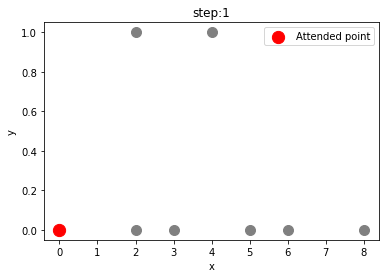

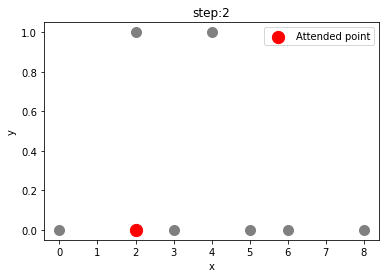

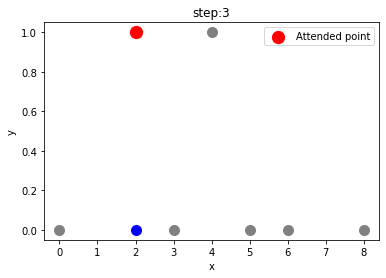

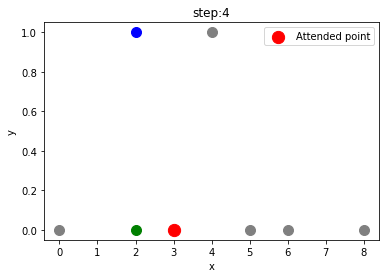

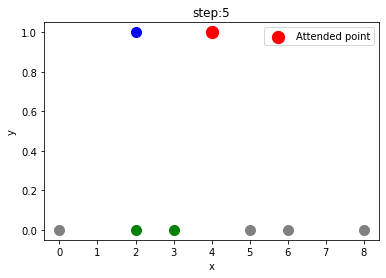

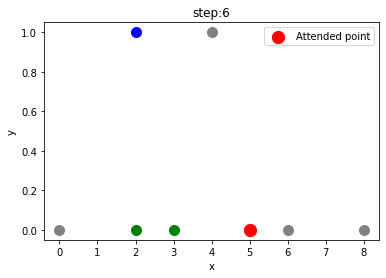

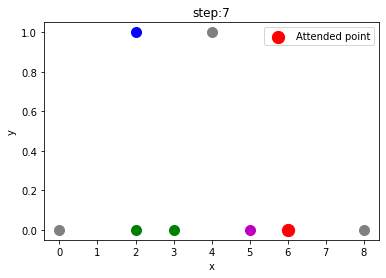

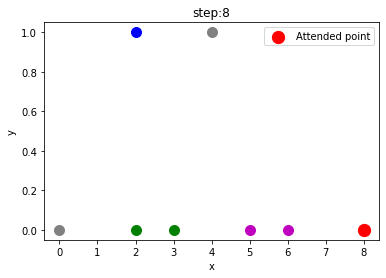

In [6]:
step = 0
for p in points:
    step += 1

    # 近傍点には自分自身も含めるので1で初期化
    n_neighborhood = 1

    tmp_neighborhoods = []
    # pの近傍を探索
    for p_another in points:
        if p.id == p_another.id:
            continue
        if calc_euclidean_distance(p,p_another) <= epsilon:
            n_neighborhood += 1
            tmp_neighborhoods.append(p_another)

    # min_pts個以上近傍点がある場合
    if n_neighborhood >= min_pts:
        # 付与するlabelを取得
        if p.belong_to is None:
            label = new_label
            new_label += 1
            # core pointにラベルを付与
            p.belong_to = label
        else:
            label = p.belong_to

        # 近傍点にラベルを付与
        for tmp_nbh in tmp_neighborhoods:
            if tmp_nbh.belong_to is not None:
                tmp_nbh.belong_to = label

    # visualize
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    for p_scat in points:
        if p.id == p_scat.id:
            ax.scatter([p_scat.x], [p_scat.y], s=150, c='r', label='Attended point')
        else:
            ax.scatter([p_scat.x], [p_scat.y], s=100, c=set_color(p_scat))

    ax.legend()
    ax.set_title('step:{}'.format(step))
    ax.set_xlabel('x')
    ax.set_ylabel('y')

    fig.show()
    # fig.savefig('img/a11-{}.png'.format(step), dpi=300)



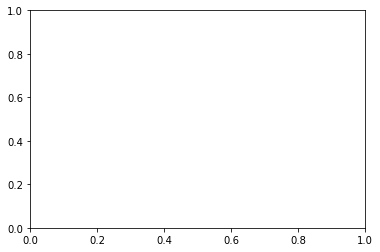

In [9]:
# visualize result
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
n_cluster = new_label
clusters = []
for p in points:
    if p in belong:
        clusters.append
# for i in range(len(x)):
#     ax.scatter([x[i]], [y[i]], s=100, c=set_color(i,points,belong))
#
# ax.set_title('Result')
# ax.set_xlabel('x')
# ax.set_ylabel('y')
#
# fig.show()
# fig.savefig('img/a11-result.png', dpi=300)

